Komputerówka - wersja 1. Do zdobycia - 33p.

Proszę nie tracić czasu na fail-safe'y dla parametrów funkcji, kod ma po prostu działać.

Jeśli kod skompiluje się wam w trakcie komputerówki to jego optymalnośc jest wystarczająca.

Proszę czytać ze zrozumieniem i jeśli to podane używać konkretnych metod. Kod powinien być czysty i bez zbędnych elementów.

Zabronione jest korzystanie z chatbotów, urządzeń elektronicznych poza pojedynczym komputerem, komunikatorów wszelkiego typu (automatyczne 0 punktów bez możliwości poprawy).

Przykładowe rozwiązanie:
Zadanie X - napisz funkcję FUN($a,b$) liczącą sumę dwóch podanych liczb. Jako przykład użyj $a=1,b=2$. Prawidłowa odpowiedź to $3$.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Zadanie 1 [8p] - Niech $X$ będzie zmienną losową przyjmującą dodatnie całkowite wartości o funkcji masy prawdopodobieństwa $p(k)=\frac{1}{k(k+1)}$, $k=1,2,\dots$. Napisz funkcję GEN($N$) przyjmującą liczbę naturalną $N$ i zwracającą wektor długości $N$ zawierający próbę IID zmiennych $X_i\stackrel{D}{=}X$. Użyj metody odwrotnej dystrybuanty. Podpowiedź: w odpowiednim miejscu użyj funkcji sufit. Za jej pomocą wygeneruj próbę wielkości $N=10^4$, którą wykorzystaj do stworzenia histogramu porównanego z teoretyczną funkcją masy prawdopodobieństwa $p(x)$. Zadbaj o odpowiednie opisy na wykresie.

In [4]:
def GEN(N):
    us = np.random.rand(N)
    samples = np.ceil(us/(1-us))
    return samples


In [71]:
def pmf(x):
    return 1/(x*(x+1))

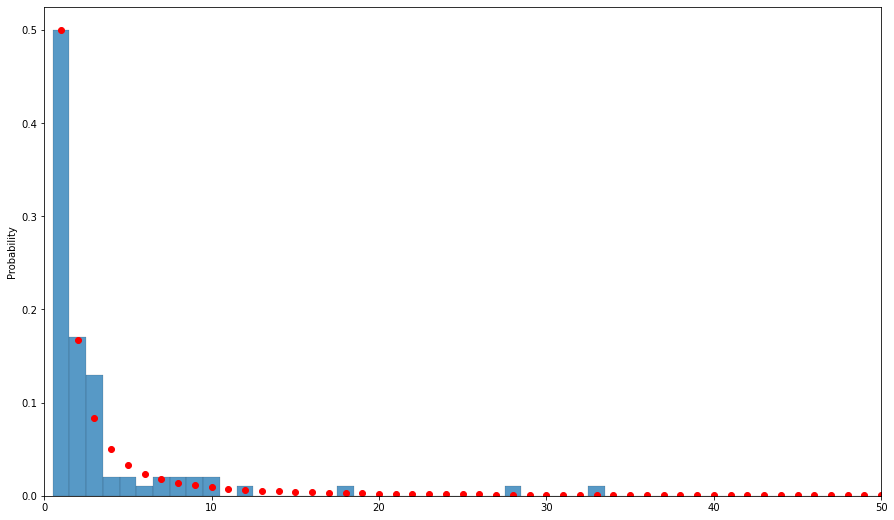

In [79]:
sample = GEN(10**2)

plt.figure(figsize=(15,9))
sns.histplot(sample, discrete=True, stat="probability",bins=10000)
xs = np.linspace(1,50,50)
plt.scatter(xs, pmf(xs),c="red")
ax = plt.gca()
ax.set_xlim([0, 50])
plt.show()

Zadanie 2 [11p] - Niech $W^1_t$, $W^2_t$ będą dwoma niezależnymi ruchami Browna (procesami Wienera). Zdefiniujmy $\tilde{W}^1_t$, $\tilde{W}^2_t$ jako modyfikacje procesów Wienera, które przy uderzeniu w górną połowę koła o promieniu $R$ przez proces $(\tilde{W}^1_t,\tilde{W}^2_t)$ wracj natychmiastowo do punktu $0$. Napisz funkcję FUN($R$, $\Delta t$, N) przyjmującą krok dyskretyzacji czasu $\Delta t$, $R>0$ oraz próbę Monte-Carlo $N$, która zwróci wyestymowaną średnią zmiennej $T$ będącej czasem pierwszego wyjścia procesu dwuwymiarowego procesu $(\tilde{W}^1_t,\tilde{W}^2_t)$ poza koło $K(R,0)$ o promieniu $R$ i środku $0$, czyli
$ T=\inf_{t\geq 0}\{t:(\tilde{W}^1_t,\tilde{W}^2_t)\in K(R,0)^C\}.$ Jako przykładu użyj parametrów $R=\frac{1}{2}$, $\Delta t=10^{-4}$, $N=10^4$. Poprawny wynik to około $0.26$

In [82]:
def FUN(R, dt, N):
    times = np.zeros(N)
    i = 0
    t2 = 0
    while i < N:
        x = 0
        y = 0
        t = t2
        while x**2 + y**2 <= R**2:
            x += np.random.normal(0, 1) * np.sqrt(dt)
            y += np.random.normal(0, 1) * np.sqrt(dt)
            t += dt
            t2 = t
        if y > 0:
            continue
        else:
            times[i] = t
            t2 = 0
            i += 1
    return np.sum(times) / N

In [84]:
print(FUN(1/2, 0.0001, 1000))

0.2637901999999853


Zadanie 3 [14p] - Napisz funkcję ESTRISK($u,c,\lambda,\mu,T,M$) estymującą prawdopodobieństwo ruiny klasycznej w czasie $T$ procesu
$$ X_t=u+ct-\sum_{i=0}^{N_t}Y_i, $$
gdzie $Y_i\sim Exp(\mu)$, $E(Y_i)=\mu$, $u,c>0$ a $M$ to wielkośc próby Monte-Carlo. $N_t$ to proces odnowy, czyli kolejna generalizacja procesu Poissona polegająca jedynie na zmianie rozkładu czasów oczekiwania z wykładniczych na dowolne dodatnie IID zmienne losowe. W naszym przypadku czas oczekiwania na kolejny skok procesu $N_t$ jest z rozkładu jednostajnego $\mathcal{U}(0,\frac{2}{\lambda})$. Wyestymuj prawdopodobieństwo ruiny klasycznej dla parametrów $u=5$,$c=3$, $\lambda=1$, $\mu=5$, $T=1$, $M=10^4$. Poprawna odpowiedź to około $0.26$.

In [7]:
def poisson_process(rate, time_duration):
    times = [np.random.uniform(0,2/rate)]
    while np.sum(times) < time_duration:
        times.append(np.random.uniform(0, 2/rate))
    times.pop()
    return np.cumsum(times)


In [2]:
def ESTRISK(u, c, lambd, mu, T, M):
    ruin_count = 0
    
    for _ in range(M):
        Nt_times = poisson_process(lambd, T)
        Y = np.random.exponential(mu, len(Nt_times))
        aggregate_claims = np.cumsum(Y)
        
        for i in range(len(Nt_times)):
            Xt = u + c * Nt_times[i] - aggregate_claims[i]
            if Xt < 0:
                ruin_count += 1
                break

    ruin_probability = ruin_count / M
    return ruin_probability

In [3]:
u = 5
c = 3
lambd = 3
mi = 5
T = 1
mc = 10**4

In [8]:
print(ESTRISK(u, c, lambd, mi, T, mc))

0.6891
